In [28]:
from itertools import count

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [29]:
df = pd.read_csv("dataset.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


1. Quante sono le istanze contenute nel dataset? _____ Il dataset è completo (cioè per ogni istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono “missing values”)? _____  Il dataset è bilanciato per quanto riguarda la classe da predire? ______ (punti 1).

In [30]:
df.shape[0]

2000

In [31]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [32]:
df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

2. Considerare la feature battery_power e rappresentare con un istogramma la distribuzione dei valori. Raggruppare poi i valori secondo questa suddivisione: gruppo1 501-800; gruppo2 801-1200; gruppo3 1201-1600; gruppo4 1601-1998, visualizzare la distribuzione nei gruppi. Indicare per ogni gruppo il numero di istanze per ogni range di prezzo. (punti 3)


battery_group
(800, 1200]     545
(1600, 1998]    519
(1200, 1600]    514
(500, 800]      422
Name: count, dtype: int64


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_group
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,"(800, 1200]"
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,"(800, 1200]"
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,"(500, 800]"
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,"(500, 800]"
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,"(1600, 1998]"


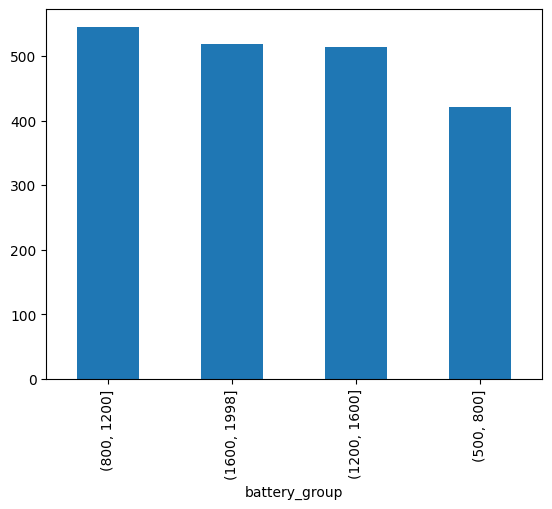

In [33]:
df["battery_power"].value_counts().plot(kind="bar")
df["battery_group"] = pd.cut(df["battery_power"], bins=[500, 800, 1200, 1600, 1998])
df["battery_group"].value_counts().plot(kind="bar")
print(df["battery_group"].value_counts())
df.head()

3. Considerare solo i cellulari che hanno il 4G e una RAM superiore (>) a 2 GB (2048 MB).


In [36]:
print(df["four_g"].value_counts())
df = df[df["four_g"]==1]
print(df["four_g"].value_counts())

df = df[df["ram"]>2047]
df

four_g
1    560
Name: count, dtype: int64
four_g
1    560
Name: count, dtype: int64


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_group
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,"(800, 1200]"
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,"(500, 800]"
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,1018,3220,13,8,18,1,0,1,3,"(1600, 1998]"
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,1005,3826,14,9,13,1,1,1,3,"(1200, 1600]"
16,838,0,0.5,0,1,1,13,0.1,196,8,...,1850,3554,10,9,19,1,0,1,3,"(800, 1200]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,915,1,0.5,1,9,1,33,0.3,199,2,...,986,2156,7,3,13,1,1,0,1,"(800, 1200]"
1977,1379,0,1.1,1,1,1,18,0.2,129,2,...,885,2358,10,5,15,1,1,0,2,"(1200, 1600]"
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,743,3579,19,8,20,1,1,0,3,"(1600, 1998]"
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,"(1600, 1998]"


Rappresentare in uno scatterplot i valori di ram (ascisse) e memoria interna (ordinate). Colorare i punti nel grafico in base al valore della colonna price_range. Usare i nomi dei due attributi come etichette dell’asse delle ascisse e dell’asse delle ordinate. (punti 4)

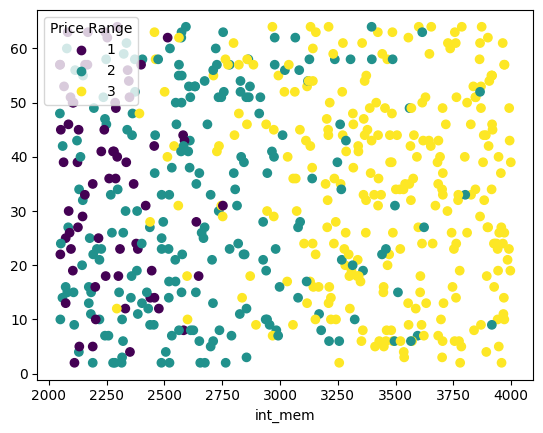

In [44]:
scatter = plt.scatter(data=df, x='ram', y='int_memory', c=df["price_range"])

plt.xlabel("ram")
plt.xlabel("int_mem")
plt.legend(*scatter.legend_elements(), title="Price Range", loc="upper left")

plt.show()

4. Realizzare una tabella pivot in cui rappresentare il numero di cellulari per ogni range di prezzo (variabile sulle colonne) considerando sulle righe le variabili touch_screen e int_memory (suddivisa in 5 gruppi). (punti 2)

In [56]:
# 1. Creiamo la colonna con i 5 gruppi di memoria
df['int_memory_group'] = pd.cut(df['int_memory'], bins=5)

# 2. Creiamo la pivot table
# values: una colonna qualsiasi per contare (es. 'ram' o 'battery_power'), basta che non abbia nulli
# aggfunc: 'count' o 'size' per contare le righe
pivot = df.pivot_table(
    index=['touch_screen', 'int_memory_group'],
    columns='price_range',
    values='battery_power', # Usiamo una colonna a caso solo per il conteggio
    aggfunc='count'
)

print(pivot)

price_range                     1   2   3
touch_screen int_memory_group            
0            (1.938, 14.4]      6  28  25
             (14.4, 26.8]       6  25  25
             (26.8, 39.2]       7  20  25
             (39.2, 51.6]      11  19  25
             (51.6, 64.0]       4  26  30
1            (1.938, 14.4]      5  29  27
             (14.4, 26.8]       8  21  26
             (26.8, 39.2]       7  13  29
             (39.2, 51.6]       6  15  38
             (51.6, 64.0]      10  19  25


/var/folders/d5/jd8cs2ds0lq81wp6tr68x7800000gn/T/ipykernel_49849/177505674.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(
